In [2]:
import pandas as pd
import numpy as np

In [4]:
# Importing the txt file and using the space character as the delimiter
df = pd.read_csv('https://gist.githubusercontent.com/stephenturner/806e31fce55a8b7175af/raw/1a507c4c3f9f1baaa3a69187223ff3d3050628d4/results.txt', sep=' ')
df

,Gene,log2FoldChange,pvalue,padj
0,DOK6,0.510000,1.861000e-08,0.000305
1,TBX5,-2.129000,5.655000e-08,0.000419
2,SLC32A1,0.900300,7.664000e-08,0.000419
3,IFITM1,-1.687000,3.735000e-06,0.006809
4,NUP93,0.365900,3.373000e-06,0.006809
...,...,...,...,...
16401,PKLR,-0.000191,9.996000e-01,0.999900
16402,OBFC1,-0.000046,9.998000e-01,0.999900
16403,FKBP8,-0.000055,9.997000e-01,0.999900
16404,LRMP,-0.000037,9.999000e-01,1.000000


In [5]:
# Checking the df for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16406 entries, 0 to 16405
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene            16406 non-null  object 
 1   log2FoldChange  16406 non-null  float64
 2   pvalue          16406 non-null  float64
 3   padj            16406 non-null  float64
dtypes: float64(3), object(1)
memory usage: 512.8+ KB


In [21]:
# Creating a status column to show the upregulated, downregulated and insignificant genes
df['status'] = np.where((df['pvalue'] < 0.01) & (df['log2FoldChange'] > 1), 
                        'upregulated', np.where((df['pvalue'] < 0.01) & (df['log2FoldChange'] <- 1),
                                                'downregulated', 'insignificant'))

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

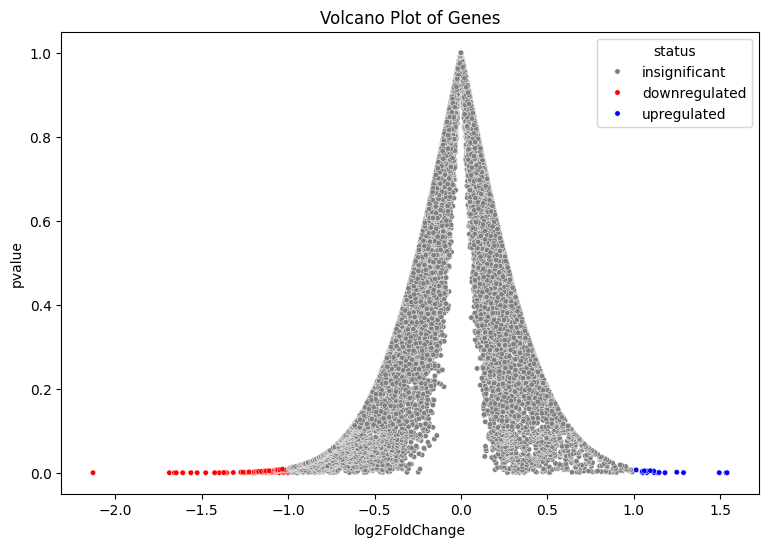

In [44]:
# Making a volcano plot of the pvalue vs log2foldchange
plt.figure(figsize=(9, 6))
palette = {'upregulated': 'blue', 
           'downregulated': 'red', 
           'insignificant': 'grey'}
sns.scatterplot(data=df, x='log2FoldChange', y='pvalue', hue='status', s=15, palette=palette)
plt.title('Volcano Plot of Genes');

In [45]:
# Making upregulated and downregulated dfs out of the main df for the gene categories
upregulated = df[df.status == 'upregulated']
downregulated = df[df.status == 'downregulated']

In [51]:
# Picking the top upregulated genes by the order of the highest log2FoldChanges
top_ug = upregulated.sort_values(by='log2FoldChange', ascending=False).head(6)
top_ug

,Gene,log2FoldChange,pvalue,padj,status,ranking_metric
20,DTHD1,1.540,0.000056,0.043710,upregulated,0.000086
5,EMILIN2,1.534,0.000003,0.006809,upregulated,0.000005
29,PI16,1.495,0.000130,0.077940,upregulated,0.000194
34,C4orf45,1.288,0.000247,0.115900,upregulated,0.000318
74,FAM180B,1.249,0.001146,0.239900,upregulated,0.001431
10,POU3F4,1.181,0.000011,0.015840,upregulated,0.000013


In [52]:
# Conversely, picking the top downregulated genes by the order of the lowest log2FoldChanges
top_dg = downregulated.sort_values(by='log2FoldChange', ascending=True).head(6)
top_dg

,Gene,log2FoldChange,pvalue,padj,status
1,TBX5,-2.129,5.655000e-08,0.000419,downregulated
3,IFITM1,-1.687,3.735000e-06,0.006809,downregulated
9,TNN,-1.658,8.973000e-06,0.014720,downregulated
11,COL13A1,-1.647,1.394000e-05,0.015920,downregulated
12,IFITM3,-1.610,1.202000e-05,0.015920,downregulated
18,LAMC3,-1.563,4.290000e-05,0.037040,downregulated
